# Projet de Traitement Automatique de la Langue

Paul Rousseau - Matthieu Verlynde

Le but de ce projet est de prendre en main les algorithmes de traitement automatique du langage (natural language processing) à partir de deux bases de données, ici destinés à l'application d'algorithmes de classification.

# Classification de revues de films

Cette partie se concentre une base de données correspondant à des revues de films écrites par des particuliers. Chaque revue est associée à une variable booléenne décrivant le fait que cet avis sur le film est positif ou négatif. L'objectif est donc dans cette partie d'implenter une classification automatique des revues comme positives ou négatives en fonction de leur contenu textuel.

## I. Importation des données

In [1]:
import numpy as np
import json
from collections import Counter

# Loading json
with open("ressources/json_pol/json_pol",encoding="utf-8") as f:
    data = f.readlines()
    json_data = json.loads(data[0])
    train = json_data["train"]
    test = json_data["test"]
    

# Quick Check
counter_train = Counter((x[1] for x in train))
counter_test = Counter((x[1] for x in test))
print("Number of train reviews : ", len(train))
print("----> # of positive : ", counter_train[1])
print("----> # of negative : ", counter_train[0])
print("")
print(train[0])
print("")
print("Number of test reviews : ",len(test))
print("----> # of positive : ", counter_test[1])
print("----> # of negative : ", counter_test[0])

print("")
print(test[0])
print("")

classes = [pol for text,pol in train]
corpus = [text for text,pol in train]

Number of train reviews :  25000
----> # of positive :  12500
----> # of negative :  12500

["The undoubted highlight of this movie is Peter O'Toole's performance. In turn wildly comical and terribly terribly tragic. Does anybody do it better than O'Toole? I don't think so. What a great face that man has!<br /><br />The story is an odd one and quite disturbing and emotionally intense in parts (especially toward the end) but it is also oddly touching and does succeed on many levels. However, I felt the film basically revolved around Peter O'Toole's luminous performance and I'm sure I wouldn't have enjoyed it even half as much if he hadn't been in it.", 1]

Number of test reviews :  25000
----> # of positive :  12500
----> # of negative :  12500

['Although credit should have been given to Dr. Seuess for stealing the story-line of "Horton Hatches The Egg", this was a fine film. It touched both the emotions and the intellect. Due especially to the incredible performance of seven year old 

## II. Approche par sacs de mots

Essayons tout d'abord avec une vectorisation directe, sans featuring des données.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out()[:10]) # we only print a few
dic_size = len(vectorizer.get_feature_names_out())
print('Taille du dictionnaire :',dic_size)

['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007']
Taille du dictionnaire : 74849


In [3]:
X

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

Nous pouvons noter que le dictionnaire créé est de taille importante. Etudions quels sont les mots les plus fréquents.

['the', 'a', 'and', 'of', 'to', 'is', 'in', 'I', 'that', 'this', 'it', '/><br', 'was', 'as', 'with', 'for', 'The', 'but', 'on', 'movie', 'are', 'film', 'his', 'have', 'not', 'you', 'be', 'at', 'by', 'he', 'one', 'an', 'from', 'who', 'like', 'all', 'they', 'has', 'so', 'just', 'or', 'about', 'her', 'out', 'some', 'very', 'more', 'This', 'would', 'what', 'when', 'good', 'if', 'their', 'only', 'It', 'really', 'had', 'up', 'even', "it's", 'can', 'which', 'were', 'see', 'my', 'no', 'than', 'she', '-', 'there', 'been', 'into', 'get', 'will', 'much', 'story', 'because', 'other', 'most', 'time', 'we', 'me', 'make', 'do', 'how', 'could', 'also', 'people', 'great', 'its', '/>The', 'first', 'any', "don't", 'made', 'think', 'bad', 'him', 'being']


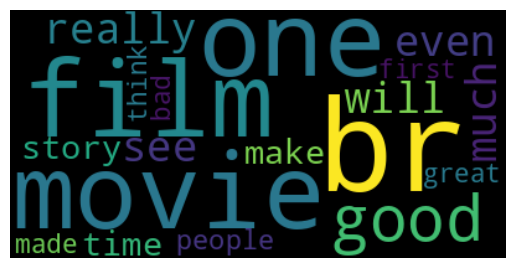

In [3]:
from collections import Counter

wc = Counter()
for text,pol in train+test:
    wc.update(text.split(" "))
    
freq_w = [w for w,f in wc.most_common(100)]
freq_w_str = ' '.join(freq_w)

from wordcloud import WordCloud

wordcloud = WordCloud().generate(freq_w_str)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

print(freq_w)

Applicons alors différents algorithmes de classification.

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5, dual='auto', max_iter=5000)
svm_clf.fit(X, classes)


true = [pol for text,pol in test]
test_corpus = [text for text,pol in test]
X_test = vectorizer.transform(test_corpus)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.81356
Logistic Regression accuracy: 0.86372
SVM accuracy: 0.84576


Nous observons déjà une précision des modèles assez élevée. Conservons ces résultats dans un tableau.

In [104]:
import pandas as pd
score = pd.DataFrame([[accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]], index=['No preprocessing'], columns=['Naive Bayes', 'Logistic Regression', 'SVM'])
score

,Naive Bayes,Logistic Regression,SVM
No preprocessing,0.81356,0.86372,0.84576


Nous pouvons essyaer d'augmenter cette décision en ne prenant pas en compte l'ensemble de mots courts très fréquents dnas la langue (comme "the", "and", "of", etc...) : les stop-words.

In [39]:
#Vectorize without stop-words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Stop words'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.81968
Logistic Regression accuracy: 0.858
SVM accuracy: 0.83484


Retirons aussi les accents présents dans les documents.

In [6]:
vectorizer = CountVectorizer(strip_accents='unicode')
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Stop words'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.81984
Logistic Regression accuracy: 0.85832
SVM accuracy: 0.83504


La précision est légèrement diminuée.
Essayons en convertissant l'ensemble du texte en minuscule.

In [40]:
vectorizer = CountVectorizer(lowercase=True)
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Lowercase'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.81356
Logistic Regression accuracy: 0.86372
SVM accuracy: 0.84576


/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Ici la précision s'est vue augmenter !

Nous pouvons également ne pas considérer les données chiffrées dans les documents, et étiqueter les mots écrits en majuscule.

In [42]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    new_text = text.replace('\b[^\W]\b', ' ') # remove single characters
    new_text = new_text.replace('[0-9]+', '') # replace numbers by nothing
    new_text = new_text.replace('[A-Z]+',' UPPERCASE') # replace uppercase words by UPPERCASE

    return new_text

vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Special characters'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.81408
Logistic Regression accuracy: 0.86656
SVM accuracy: 0.84892


/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


La précision a augmenté également grâce à ce prétraitement.

Nous pouvons effectuer un processus de "stemming", c'est à dire de coupe des suffixes des mots, pour diminuer la taille du dictionnaire.

In [44]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    new_text = text.replace('ly ', ' ') #replace words ending with 'ly' by the word with 'ly' removed
    new_text = new_text.replace('ing ', ' ') #replace words ending with 'ing' by the word with 'ing' removed
    new_text = new_text.replace('ed ', ' ') #replace words ending with 'ed' by the word with 'ed' removed

    return  new_text

vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Stemming'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.81228
Logistic Regression accuracy: 0.86672
SVM accuracy: 0.84876


/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Nous pouvons également considérer les couples de mots.

In [45]:
vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['N-grams'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.85692
Logistic Regression accuracy: 0.89648
SVM accuracy: 0.8912


Essayons également une vectorisation basée sur la présence/absence des mots au sein d'un document, avec une approche donc binarisée.

In [47]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Binary'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naïve Bayes accuracy: 0.8292
Logistic Regression accuracy: 0.87096
SVM accuracy: 0.851


Enfin, testons l'application d'une transformation en TF-IDF permettant d'ajouter un poids aux mots associé à leur présence dans les documents. 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['TFIDF'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

Naïve Bayes accuracy: 0.82956
Logistic Regression accuracy: 0.88316
SVM accuracy: 0.8772


Nous pouvons maintenant observer les différents scores afin de sélectionner les prétraitements qui nous semble adéquats.

In [106]:
score


,Naive Bayes,Logistic Regression,SVM
No preprocessing,0.81356,0.86372,0.84576
Stop words,0.81968,0.85800,0.83484
Lowercase,0.81356,0.86372,0.84576
Special characters,0.81408,0.86656,0.84892
Stemming,0.81228,0.86672,0.84876
N-grams,0.85692,0.89648,0.89120
Binary,0.82920,0.87096,0.85100
TFIDF,0.82956,0.88316,0.87720


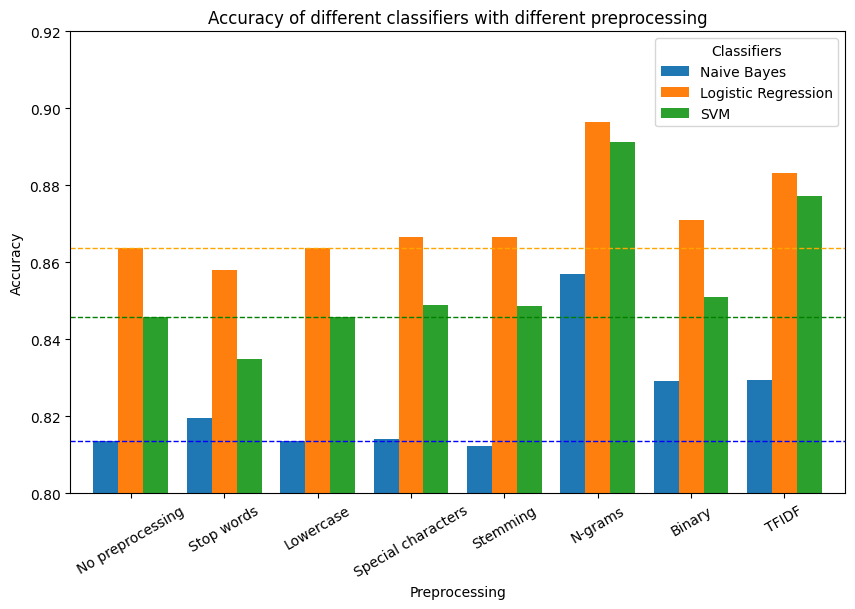

In [108]:
# Plotting
ax = score.plot(kind='bar', width=0.8, figsize=(10, 6))

ax.set_xlabel('Preprocessing')
ax.set_ylabel('Accuracy')
ax.legend(title='Classifiers')
ax.set_ylim(0.8, 0.92)
ax.axhline(score.iloc[0]['Naive Bayes'], color='blue', linestyle='--', linewidth=1)
ax.axhline(score.iloc[0]['Logistic Regression'], color='orange', linestyle='--', linewidth=1)
ax.axhline(score.iloc[0]['SVM'], color='green', linestyle='--', linewidth=1)
ax.set_title('Accuracy of different classifiers with different preprocessing')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
plt.show()

Les prétraitements basés sur la délétion des stop-words et la mise en minuscule sont les seuls n'apportant pas d'amélioration de score pour les classifieurs LinearRegression et SVM. Appliquons alors les autres prétraitements.

In [109]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    new_text = text.replace('\b[^\W]\b', ' ') # remove single characters
    new_text = new_text.replace('[0-9]+', '') # replace numbers by nothing
    new_text = new_text.replace('[A-Z]+',' UPPERCASE') # replace uppercase words by UPPERCASE
    new_text = new_text.replace('ly ', ' ') #replace words ending with 'ly' by the word with 'ly' removed
    new_text = new_text.replace('ing ', ' ') #replace words ending with 'ing' by the word with 'ing' removed
    new_text = new_text.replace('ed ', ' ') #replace words ending with 'ed' by the word with 'ed' removed

    return  new_text

vectorizer = TfidfVectorizer(binary=True, ngram_range=(1,2), preprocessor=preprocess, analyzer='word')
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test_corpus)

nb_clf.fit(X, classes)
lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Naïve Bayes accuracy: {accuracy_score(true, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

#add results to score
score.loc['Combine'] = [accuracy_score(true, pred_nb), accuracy_score(true, pred_lr), accuracy_score(true, pred_svm)]

Naïve Bayes accuracy: 0.87424
Logistic Regression accuracy: 0.89384
SVM accuracy: 0.90608


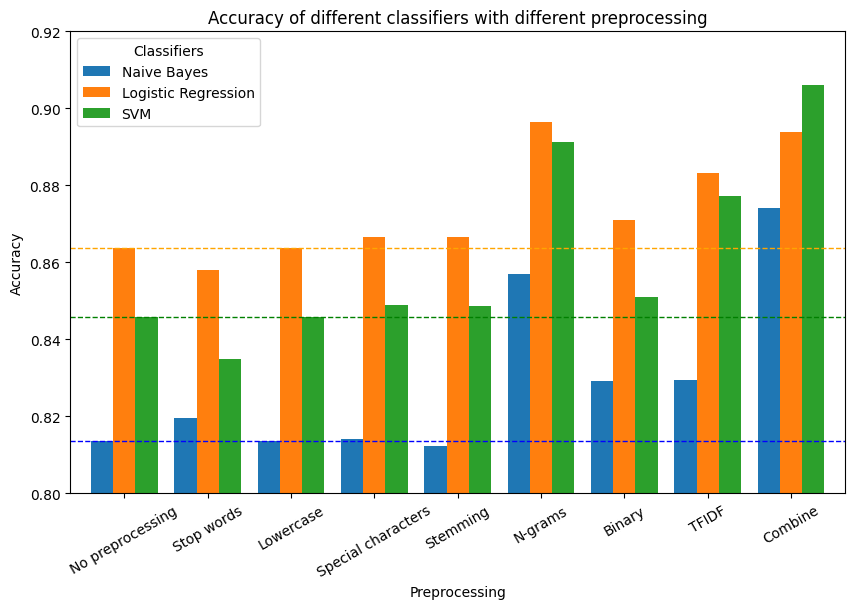

In [111]:
# Plotting
ax = score.plot(kind='bar', width=0.8, figsize=(10, 6))

ax.set_xlabel('Preprocessing')
ax.set_ylabel('Accuracy')
ax.legend(title='Classifiers')
ax.set_ylim(0.8, 0.92)
ax.axhline(score.iloc[0]['Naive Bayes'], color='blue', linestyle='--', linewidth=1)
ax.axhline(score.iloc[0]['Logistic Regression'], color='orange', linestyle='--', linewidth=1)
ax.axhline(score.iloc[0]['SVM'], color='green', linestyle='--', linewidth=1)
ax.set_title('Accuracy of different classifiers with different preprocessing')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
plt.show()

Nous avons significativement augmenté la précision de nos classifieurs. Observons alors les mots associés aux classes de notre base de données.

In [114]:
#Linear SVM
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

k = 20
feat_svm = svm_clf.coef_[0]
features = {v:k for k,v in vectorizer.vocabulary_.items()} # invert mapping (k2v)
feat_sorted = np.argsort(feat_svm)

print('Most negative: ',[features[i] for i in feat_sorted[:k]])
print('Most positive: ',[features[i] for i in np.flip(feat_sorted[-k:])])


SVM accuracy: 0.90608
Most negative:  ['bad', 'worst', 'poor', 'awful', 'the worst', 'waste', 'bor', 'terrible', 'dull', 'worse', 'noth', 'disappointment', 'stupid', 'ridiculous', 'mess', 'horrible', 'fails', 'Unfortunately', 'boring', 'at all']
Most positive:  ['great', 'excellent', 'perfect', 'wonderful', 'the best', 'today', 'beautiful', 'fun', 'superb', 'best', 'love', 'lov', 'well', 'enjoy', 'brilliant', 'is great', 'enjoyable', 'favorite', 'definite', 'lik']


## III. Representation learning

Explorons maintenant une approche en apprentissage de représentation.

In [116]:
import gensim
import logging

Configurons notre modèle Word2Vec sur le texte de nos données.

In [119]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

text = [t.split() for t,p in train]

# the following configuration is the default configuration
w2v = gensim.models.word2vec.Word2Vec(sentences=text,
                                vector_size=100, window=5, # here we train a cbow model 
                                min_count=5,                      
                                sample=0.001, workers=3,
                                sg=1, hs=0, negative=5, # set sg to 1 to train a sg model
                                cbow_mean=1, epochs=5)

2024-01-14 19:19:24,262 : INFO : collecting all words and their counts
2024-01-14 19:19:24,265 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-01-14 19:19:25,188 : INFO : PROGRESS: at sentence #10000, processed 2358544 words, keeping 155393 word types
2024-01-14 19:19:25,808 : INFO : PROGRESS: at sentence #20000, processed 4675912 words, keeping 243050 word types
2024-01-14 19:19:26,058 : INFO : collected 280617 word types from a corpus of 5844680 raw words and 25000 sentences
2024-01-14 19:19:26,060 : INFO : Creating a fresh vocabulary
2024-01-14 19:19:26,328 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 49345 unique words (17.58% of original 280617, drops 231272)', 'datetime': '2024-01-14T19:19:26.328027', 'gensim': '4.3.2', 'python': '3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]', 'platform': 'Linux-5.15.133.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-01-14 19:19:26,329 : INFO : Wor

In [120]:
# w2v.save("W2v-movies.dat")
w2v = gensim.models.Word2Vec.load("W2v-movies.dat")

2024-01-14 19:20:42,397 : INFO : loading Word2Vec object from W2v-movies.dat
2024-01-14 19:20:42,433 : INFO : loading wv recursively from W2v-movies.dat.wv.* with mmap=None
2024-01-14 19:20:42,434 : INFO : setting ignored attribute cum_table to None
2024-01-14 19:20:42,760 : INFO : Word2Vec lifecycle event {'fname': 'W2v-movies.dat', 'datetime': '2024-01-14T19:20:42.760749', 'gensim': '4.3.2', 'python': '3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]', 'platform': 'Linux-5.15.133.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'loaded'}


Vectorisons alors nos données pour ensuite effectuer la classification. Nous implémentons plusieurs méthodes d'aggrégation (somme, moyenne, minimum et maximum) des vecteurs associés aux mots pour calculer les vecteurs associés aux documents.

In [121]:
def vectorize(text, model_w2v, aggregation='sum'):
    """
    This function should vectorize one review

    input: str
    output: np.array(float)
    """    
    
    vec,i = 0,0

    if aggregation=='sum' or aggregation=='mean':
        for word in text.split():
            if word.lower() in model_w2v.key_to_index.keys():
                vec = np.add(vec,model_w2v[word.lower()])
                i += 1
        if aggregation=='mean':
            vec = np.divide(vec,i)
    
    if aggregation=='min':
        for word in text.split():
            if word.lower() in model_w2v.key_to_index.keys():
                vec = np.minimum(vec,model_w2v[word.lower()])

    if aggregation=='max':
        for word in text.split():
            if word.lower() in model_w2v.key_to_index.keys():
                vec = np.maximum(vec,model_w2v[word.lower()])

    return vec

classes = [pol for text,pol in train]
X = [vectorize(text,model_w2v=w2v.wv, aggregation='sum') for text,pol in train]
X_test = [vectorize(text,model_w2v=w2v.wv,aggregation='sum') for text,pol in test]
true = [pol for text,pol in test]

Testons alors nos classifieurs sur ces données vectorisées.

In [123]:
#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5, dual='auto', max_iter=5000)
svm_clf.fit(X, classes)

pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.82648
SVM accuracy: 0.82704


La précision des classifieurs est ici inférieure à celle que nous avions sous l'approche "sacs de mots", mais le temps de calcul est bien moindre. Essayons maintenant avec une vectorisation des documents basée sur l'aggrégation des mots par moyenne des vecteurs.

In [124]:
X = [vectorize(text,model_w2v=w2v.wv,aggregation='mean') for text,pol in train]
X_test = [vectorize(text,model_w2v=w2v.wv,aggregation='mean') for text,pol in test]

lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

Logistic Regression accuracy: 0.8214
SVM accuracy: 0.82616


La précision est alors diminuée. Essayons donc avec les approches min et max.

In [125]:
X = [vectorize(text,model_w2v=w2v.wv,aggregation='max') for text,pol in train]
X_test = [vectorize(text,model_w2v=w2v.wv,aggregation='max') for text,pol in test]

lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print("Max aggregation ---------- ")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

X = [vectorize(text,model_w2v=w2v.wv,aggregation='min') for text,pol in train]
X_test = [vectorize(text,model_w2v=w2v.wv,aggregation='min') for text,pol in test]

lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

print("Min aggregation ---------- ")
print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

Max aggregation ---------- 
Logistic Regression accuracy: 0.72944
SVM accuracy: 0.72928


/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Min aggregation ---------- 
Logistic Regression accuracy: 0.70556
SVM accuracy: 0.70636


Si nous essayons avec un modèle Word2Vec pré-entraîné :

In [127]:
import gensim.downloader

print(gensim.downloader.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


S'agissant de revues de films de particuliers, basé sur des sentiments pour une grande partie, utiliser un modèle basé sur des publications issues de Twitter semble pertinent. Nous choisissons donc alors d'utiliser le modèle "glove-twitter-100".

In [128]:
w2v = gensim.downloader.load('glove-twitter-100')

2024-01-14 19:28:28,912 : INFO : loading projection weights from /home/mverlynde/gensim-data/glove-twitter-100/glove-twitter-100.gz
2024-01-14 19:29:44,750 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 100) matrix of type float32 from /home/mverlynde/gensim-data/glove-twitter-100/glove-twitter-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-14T19:29:44.747842', 'gensim': '4.3.2', 'python': '3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]', 'platform': 'Linux-5.15.133.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}


In [129]:
X = [vectorize(text,model_w2v=w2v,aggregation='sum') for text,pol in train]
X_test = [vectorize(text,model_w2v=w2v,aggregation='sum') for text,pol in test]

lr_clf.fit(X, classes)
svm_clf.fit(X, classes)

pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Logistic Regression accuracy: {accuracy_score(true, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(true, pred_svm)}")

/home/mverlynde/miniconda3/envs/projvguig/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.79772
SVM accuracy: 0.79868


Les précisions obtenues sont alors inférieures à celles du modèle entraîné sur nos données.